In [208]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spotify-dataset-19212020-160k-tracks/super_genres.json
/kaggle/input/spotify-dataset-19212020-160k-tracks/data_w_genres.csv
/kaggle/input/spotify-dataset-19212020-160k-tracks/data_by_genres.csv
/kaggle/input/spotify-dataset-19212020-160k-tracks/data_by_year.csv
/kaggle/input/spotify-dataset-19212020-160k-tracks/data.csv
/kaggle/input/spotify-dataset-19212020-160k-tracks/data_by_artist.csv


In [209]:
spotify = pd.read_csv('/kaggle/input/spotify-dataset-19212020-160k-tracks/data.csv')
spotify.head()

,Unnamed: 0,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,8,1921,0.4150,60.936,0.9630,1921
1,1,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",5,1921,0.0366,80.954,0.0594,1921
2,2,0.996,['John McCormack'],0.518,159507,0.203,0,5uNZnElqOS3W4fRmRYPk4T,0.000000,0,0.115,-10.589,1,The Wearing of the Green,6,1921,0.0615,66.221,0.4060,1921
3,3,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,1SCWBjhk5WmXPxhDduD3HM,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,0.0594,1921
4,4,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,4,1921,0.0380,101.665,0.2530,1921


In [210]:
print(len(spotify))

168592


In [211]:
import seaborn as sns

# ВСЯКАЯ ЗАБАВНАЯ ЕРУНДА

**первая удивительная вещь - в мажоре песня написана или в миноре очень незначительно влияет на то, насколько она радостная**

[]

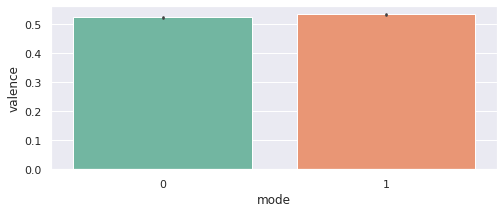

In [241]:
sns.set_palette("Set2")
ax = sns.barplot(x="mode", y="valence", data=spotify)
ax.set()

**зато у песен в миноре гораздо чаще матерные тексты**

[]

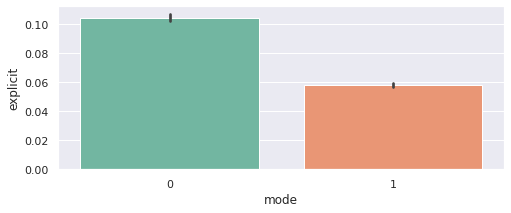

In [242]:
ax = sns.barplot(x="mode", y="explicit", data=spotify)
ax.set()

**так что музыкалка лжет - мажор и минор это не про весело и грустно, это про то, хорошо ли туда вписывается мат**

информация от кэпа: чем громче музыка, тем она, чаще всего, энергичнее

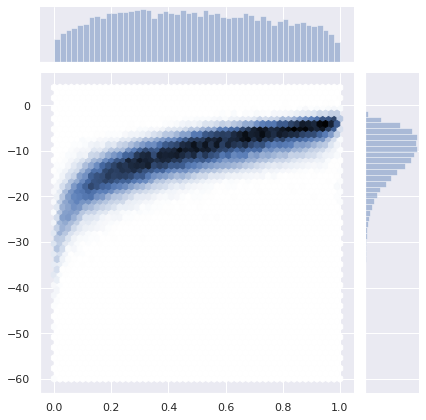

In [237]:
sns.set_style("darkgrid")
plt1 = sns.jointplot(x = ["energy"], y = ["loudness"], kind = 'hex', data = spotify)

# Можно отличать исполнителей по данным, предложенным спотифаем?

для того, чтобы ответить на этот вопрос, я выберу двух похожих исполнителей, которые были активны в примерно один и тот же промежуток времени - the beatles и the rolling stones. очевидно, что если сравнивать шопена и сердючку сразу все будет понятно по danceability и speechiness - так что совсем разных выбирать неинтересно. интересно, получится ли по этому ограниченному набору показателей отличить кого-то похожего

In [214]:
beatles_n_stones = spotify.loc[lambda spotify: (spotify['artists'] == "['The Beatles']")|(spotify['artists'] == "['The Rolling Stones']")]
beatles_n_stones = beatles_n_stones[beatles_n_stones.year<1970]

перестраховываюсь потому что не помню как эти поцаны копируются нормально или нет

In [215]:
import copy
checkpoint_bns = copy.deepcopy(beatles_n_stones)

это маленький бесполезный чекпоинт для моего личного успокоения

In [216]:
print(len(beatles_n_stones), 275+263, sep = ' ')

538 538


In [217]:
beatles_n_stones.tail()

,Unnamed: 0,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
163115,163115,0.009380,['The Rolling Stones'],0.313,210827,0.912,0,1Jhm2dD5clKvRQffs2EZ0s,0.000000,4,0.9020,-6.978,1,19th Nervous Breakdown - Live,18,1966-12-10,0.0605,105.424,0.493,1966
163117,163117,0.607000,['The Rolling Stones'],0.322,450427,0.657,0,1UrdssLSXJRycvdYZONRJx,0.000102,0,0.1030,-9.094,1,You Can't Always Get What You Want - Mono,16,1966-01-01,0.0637,87.451,0.533,1966
163137,163137,0.428000,['The Rolling Stones'],0.582,183187,0.882,0,3ORnpJxVxKaKGvNDmxiegs,0.033700,7,0.0445,-4.859,1,Honky Tonk Women - Mono,19,1966-01-01,0.0499,119.224,0.965,1966
163184,163184,0.000866,['The Rolling Stones'],0.511,123680,0.955,0,0M7e8MUFjyFkVLuRmjTiql,0.860000,2,0.8140,-8.749,1,Not Fade Away - Live,17,1966-12-10,0.0945,122.436,0.525,1966
163430,163430,0.011000,['The Rolling Stones'],0.561,195240,0.725,0,4jK5xv29eFBN6GwpRQ6Al0,0.007020,0,0.2130,-11.091,1,Street Fighting Man,24,1969-09-12,0.0312,127.996,0.775,1969


отфигачиваем от матрицы все что деревья гипотетически могут запомнить по значению и данные не в числах

In [218]:
del beatles_n_stones['id']
del beatles_n_stones ['release_date']
del beatles_n_stones ['year']
del beatles_n_stones ['name']
beatles_n_stones = beatles_n_stones.iloc[:, 1:] #дада мне лень вспоминать как называется тот столбец


пусть beatles = 1, а stones = 0
заменим значения в таблице и заодно создадим список который это запомнит потому что у меня башка дырявая

In [219]:
beatles_n_stones = beatles_n_stones.replace("['The Beatles']", 1)
beatles_n_stones = beatles_n_stones.replace("['The Rolling Stones']", 0)

In [220]:
B_n_S = ['Rolling Stones', 'Beatles']

теперь разделим это на X и Y а потом на тестовую и учебную выборки

In [221]:
Y = beatles_n_stones.iloc[:, 1].values
del beatles_n_stones ['artists']
X = beatles_n_stones.values

In [222]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

кусо4ек лежащий тут пока что бесполезен, но может понадобиться потом, когда я буду искать в каких именно песнях классификатор ошибся. да, я наивно надеюсь на то, что у всех песен разная длительность и делаю словарь который по номеру песни в тестовом иксе выдает ее длительность как значение

ТУТ КСТАТИ ОЧЕНЬ ПРИНЦИПИАЛЬНЫЙ МОМЕНТ - ЗАПУСКАТЬ ЕГО НАДО СТРОГО ПОСЛЕ ПРОШЛОГО КУСКА КОДА, ПОКА ВСЕ ЗНАЧЕНИЯ НЕ НОРМАЛИЗОВАНЫ

In [223]:
#print(X_test[1])
finding_the_name = {i:X_test[i, 2] for i in range(len(X_test))}
finding_the_name

{0: 135520.0,
 1: 332560.0,
 2: 159720.0,
 3: 207200.0,
 4: 450427.0,
 5: 207680.0,
 6: 222307.0,
 7: 154080.0,
 8: 213027.0,
 9: 303187.0,
 10: 118293.0,
 11: 204480.0,
 12: 154200.0,
 13: 64427.0,
 14: 213107.0,
 15: 167307.0,
 16: 185027.0,
 17: 180693.0,
 18: 323027.0,
 19: 164893.0,
 20: 119507.0,
 21: 196827.0,
 22: 146267.0,
 23: 165160.0,
 24: 165293.0,
 25: 255120.0,
 26: 161187.0,
 27: 412253.0,
 28: 148893.0,
 29: 108547.0,
 30: 144773.0,
 31: 158147.0,
 32: 385013.0,
 33: 207573.0,
 34: 146440.0,
 35: 188960.0,
 36: 165613.0,
 37: 123480.0,
 38: 175387.0,
 39: 390013.0,
 40: 177427.0,
 41: 206773.0,
 42: 221520.0,
 43: 156867.0,
 44: 236520.0,
 45: 181360.0,
 46: 25987.0,
 47: 269787.0,
 48: 154280.0,
 49: 136640.0,
 50: 193493.0,
 51: 170720.0,
 52: 125040.0,
 53: 216440.0,
 54: 263560.0,
 55: 181307.0,
 56: 146333.0,
 57: 154200.0,
 58: 221533.0,
 59: 513813.0,
 60: 194960.0,
 61: 196520.0,
 62: 157667.0,
 63: 217227.0,
 64: 327880.0,
 65: 180893.0,
 66: 156947.0,
 67: 15

вроде как нормализовать все данные при форесте не очень нужно, но вот я при нужде умею смотрите

In [224]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [225]:
from matplotlib import pyplot

# Обучение и исследования вклада фич (спойлер: селекшна не будет)

я обучаю свой лес на 200 деревьях. я и 20 пробовала, и 1000, но 200 дает лучшую balanced accuracy и скорость, так что я 200 оставила
снизу я пишу кривой код по показыванию значимости фич. 

анализ - тебе

In [226]:
from sklearn.model_selection import cross_validate

вот я сначала хотела сделать 10fold cross validation потому что читала об этом в статье а потом передумала потому что не умею и у меня голова болит. как-нибудь в другой раз

Feature: acousticness, Score: 0.06707
Feature: danceability, Score: 0.04775
Feature: duration_ms, Score: 0.09269
Feature: energy, Score: 0.12933
Feature: explicit, Score: 0.00000
Feature: instrumentalness, Score: 0.09098
Feature: key, Score: 0.02308
Feature: liveness, Score: 0.04709
Feature: loudness, Score: 0.05769
Feature: mode, Score: 0.00426
Feature: popularity, Score: 0.24839
Feature: speechiness, Score: 0.05833
Feature: tempo, Score: 0.05747
Feature: valence, Score: 0.07589


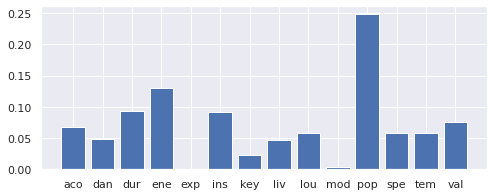

In [227]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=200)#, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

my_features = list(beatles_n_stones)
importance = classifier.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0s, Score: %.5f' % (my_features[i],v))

pyplot.bar([my_features[x][:3] for x in range(len(importance))], importance)
pyplot.show()


алгоритм отличает the rolling stones от the beatles по популярности, энергичности,продолжительности и количеству инструментала в песне - эти параметры наиболее значимы

самыми бесполезными фичами оказались наличие мата и тональность песни (ака совокупность бесполезных фич показывающих тонику и лад - тут только ионийский и дорийский). с одной стороны это странно, потому что мы видели, как битлз тяготеют к до мажору, а с другой более продвинутые музыкально ролинги тоже вполне себе могли использовать тот же до мажор..........

вообще жалко что в датасете были только эолийский и ионийский (минор и мажор) - если б были другие, можно было бы отследить отклонения в джаз и всякие эксперименты

*нет мы не видели что битлз тяготеют к до мажору потому что я это убрала. ну ничего - тогда сюда перепишу, чтобы наглядно было. тут на каунтплоте отмечены тональности - тоники цифрами (0 - до), а лад ноликом или единичкой. короче чаще всего до мадор, на втором месте ре мажор, потом соль мажор - те тональности, в которых для трезвучий от тоники, доминанты и субдоминанты мало сложных барре для гитары*

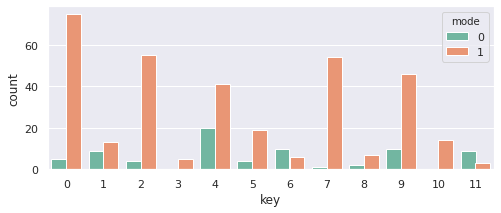

In [243]:
sns.set_palette("Set2")
beatles = spotify.loc[lambda spotify: (spotify['artists'] == "['The Beatles']")]
ax = sns.countplot(x="key", hue="mode", data=beatles)

*и еще оффтопом: битлы с годами грустнели*

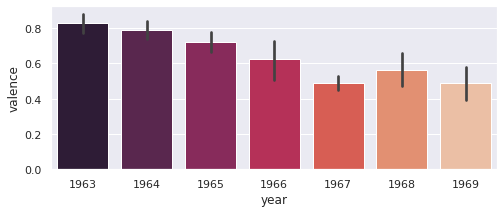

In [244]:
ax = sns.barplot(x="year", y="valence",palette="rocket",  data=beatles.loc[beatles['year']<1970])

sns.set(rc={'figure.figsize':(8,3)})

# Результаты предсказания

In [230]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[78  8]
 [12 64]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89        86
           1       0.89      0.84      0.86        76

    accuracy                           0.88       162
   macro avg       0.88      0.87      0.88       162
weighted avg       0.88      0.88      0.88       162

0.8765432098765432


не вах так точно но под пивас пойдет

## Визуализируем это на ROC-кривой и Presision-Recall

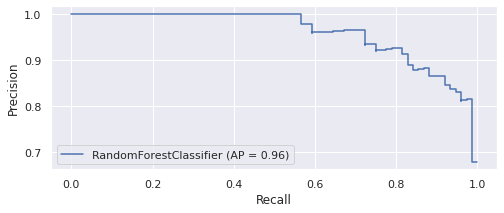

In [231]:
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(classifier, X_test, y_test)

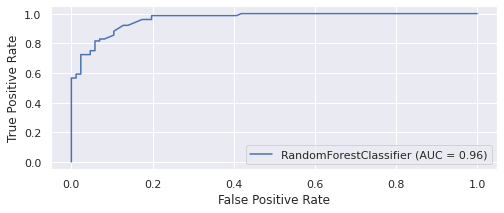

In [232]:
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(classifier, X_test, y_test)

делаю вид что знаю что значат эти графики а на самом деле меня так в 10 классе научили вот пользуюсь как могу выжимаю из своей информатики все

шучу я знаю что они значат но понимаю их ток на уровне "ROC-кривая обозначает точность и должна прилегать к правому верхнему углу а пресижн реколл к левому верхнему"

## В каких же песнях классификатор ошибся?

In [233]:
for row_index, (input, prediction, label) in enumerate(zip (X_test, y_pred, y_test)):
  if prediction != label:
    length = finding_the_name[row_index]
    name = checkpoint_bns.loc[checkpoint_bns['duration_ms'] == length].iloc[0, 13]
    print(name, 'был классифицирован как', B_n_S[prediction], 'а должен был быть классифицирован как', B_n_S[label])

Everybody Needs Somebody To Love - Long Version был классифицирован как Beatles а должен был быть классифицирован как Rolling Stones
A Hard Day's Night - Remastered 2009 был классифицирован как Rolling Stones а должен был быть классифицирован как Beatles
Penny Lane - Stereo Mix 2017 был классифицирован как Rolling Stones а должен был быть классифицирован как Beatles
Mother's Little Helper был классифицирован как Beatles а должен был быть классифицирован как Rolling Stones
It's All Too Much - Remastered 2009 был классифицирован как Rolling Stones а должен был быть классифицирован как Beatles
Ob-La-Di, Ob-La-Da - Remastered 2009 был классифицирован как Rolling Stones а должен был быть классифицирован как Beatles
Lovely Rita был классифицирован как Rolling Stones а должен был быть классифицирован как Beatles
Penny Lane - Capitol Records Mono US Promo Mix был классифицирован как Rolling Stones а должен был быть классифицирован как Beatles
Helter Skelter - Remastered 2009 был классифицирова

резы очень прикольные, потому что, порывшись на всяких форумах "какая песня стоунз похожа на песни битлз" (форумов на обратную тему оч мало и они невнятные, что логично) я нашла совпадения: многие говорят, что Come On, Ruby Tuesday, Under My Thumb, [Paint It Black](http://www.quora.com/What-songs-by-The-Rolling-Stones-come-the-closest-to-sounding-like-material-from-The-Beatles) и It's All Too Much(из-за использование ситар) похожи на  [битлов](https://www.reddit.com/r/beatles/comments/7gycmf/which_rolling_stones_song_sounds_like_beatles_one/) и они при прогонке алгоритма оказываются в неправильных предсказаниях.

про ruby tuesday вообще общеизвестный факт

дада всего неправильных предсказаний не так много и учитывая то что они действительно (по словам фанатов) похожи на правильные предсказания, крутой классификатор получился